In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HeartDiseaseData.csv")
df.sample(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
571,60,Male,Typical angina,145,282,Lower than 120 mg/ml,Normal,142,Yes,2.8,Flat,Two,Reversable Defect,0
199,50,Male,Typical angina,144,200,Lower than 120 mg/ml,Normal,126,Yes,0.9,Flat,Zero,Reversable Defect,0
689,54,Female,Non-anginal pain,135,304,Greater than 120 mg/ml,ST-T wave abnormality,170,No,0.0,Downsloping,Zero,Fixed Defect,1
739,52,Male,Typical angina,128,255,Lower than 120 mg/ml,ST-T wave abnormality,161,Yes,0.0,Downsloping,One,Reversable Defect,0
381,58,Male,Non-anginal pain,132,224,Lower than 120 mg/ml,Normal,173,No,3.2,Downsloping,Two,Reversable Defect,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Distribution of Age')

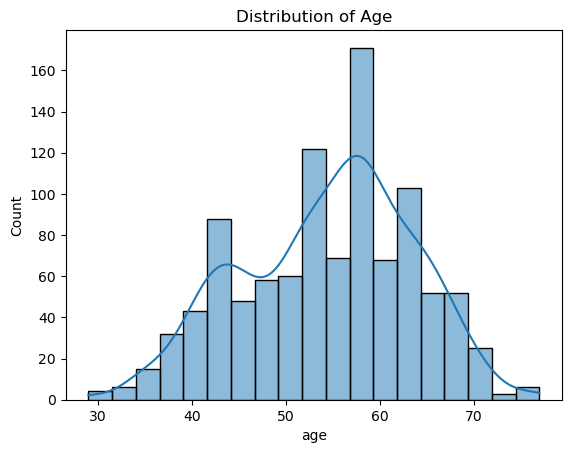

In [6]:
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Blood Pressure')

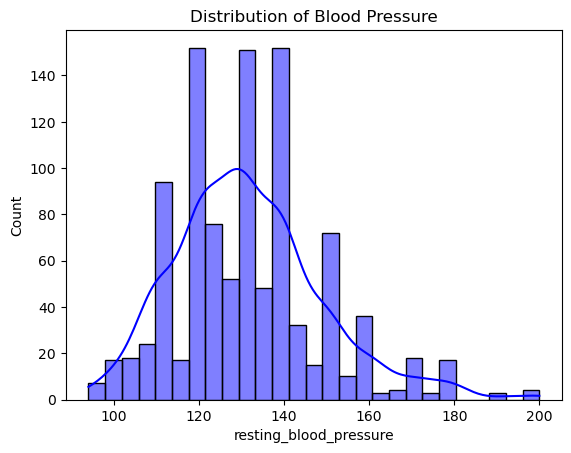

In [7]:
sns.histplot(df['resting_blood_pressure'], kde=True, color='b')
plt.title("Distribution of Blood Pressure")

Text(0.5, 1.0, 'Distribution of cholestoral')

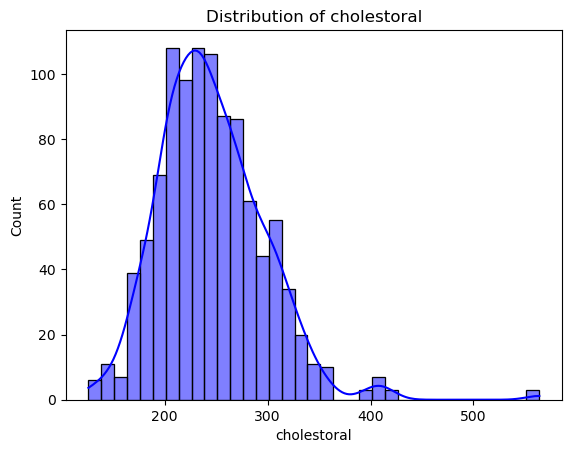

In [8]:
sns.histplot(df['cholestoral'], kde=True, color='b')
plt.title("Distribution of cholestoral")    ## right skewed

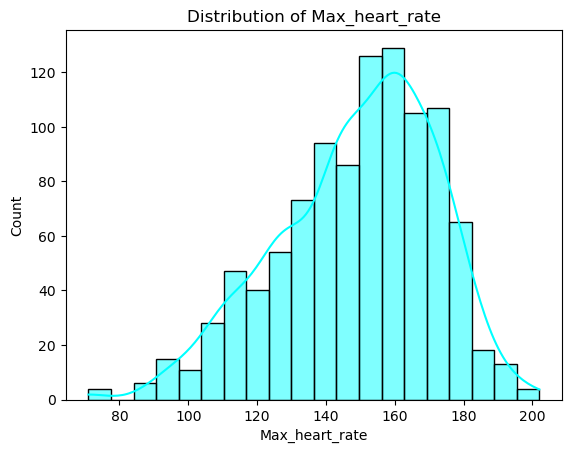

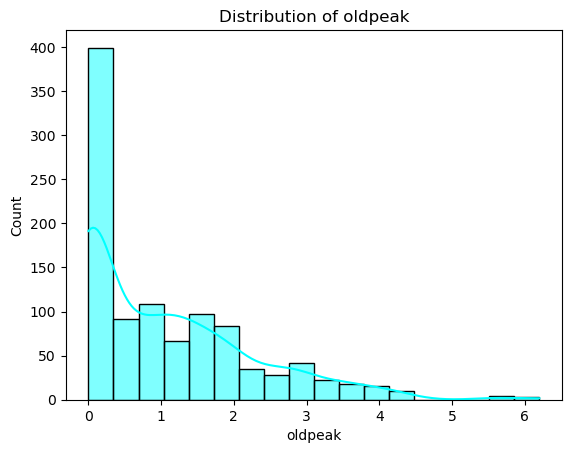

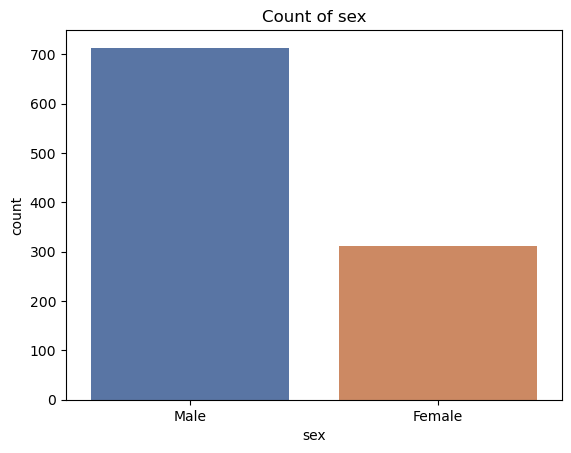

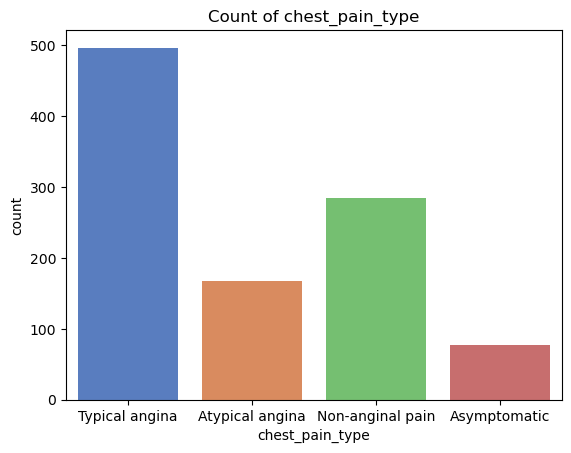

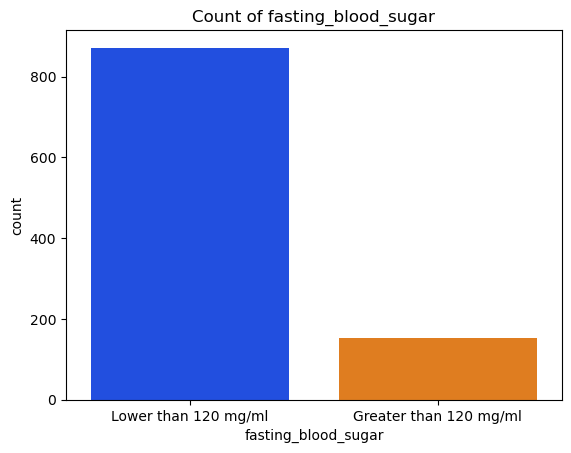

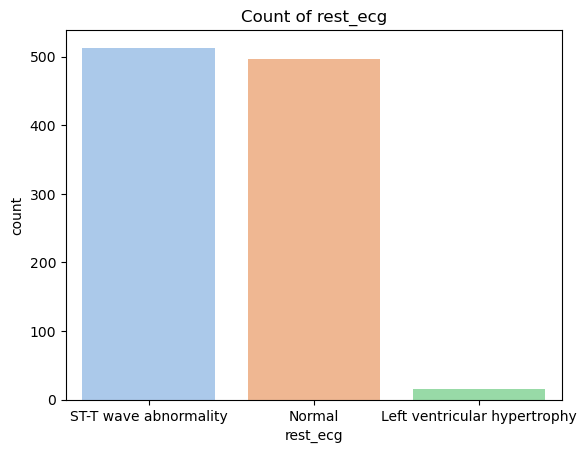

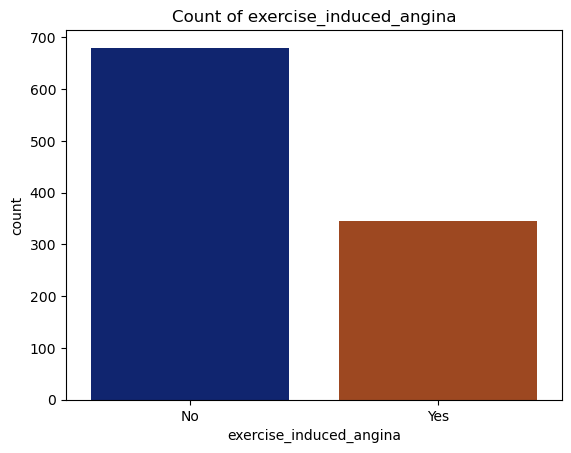

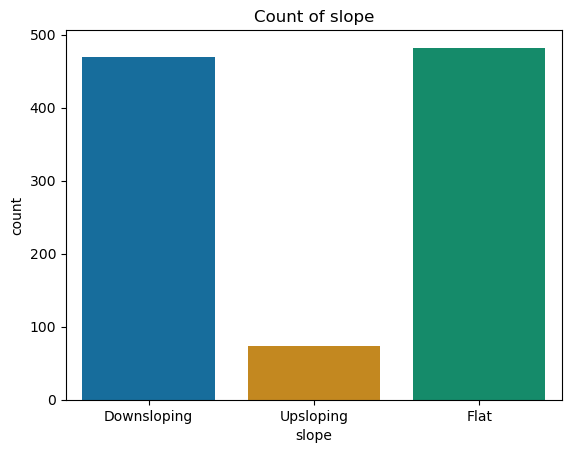

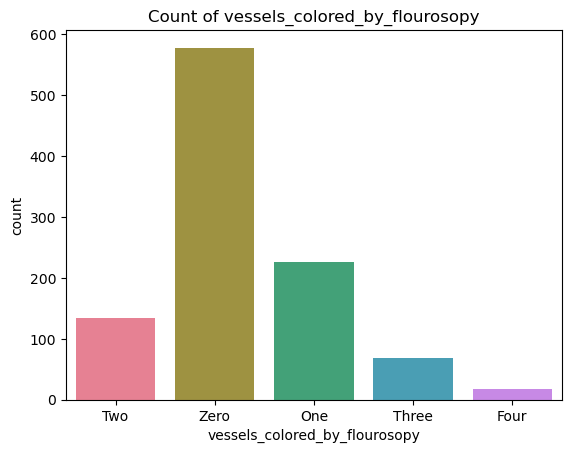

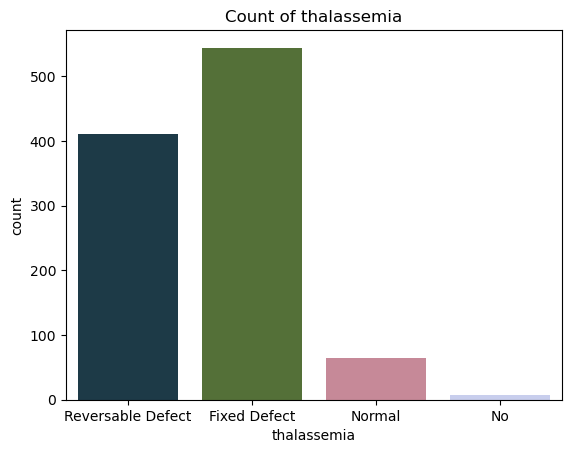

In [9]:
for col in ['Max_heart_rate','oldpeak']:
    sns.histplot(df[col], kde=True, color='cyan')
    plt.title(f"Distribution of {col}")
    plt.show()
    palettes = [
    'deep',     
    'muted',     
    'bright',    
    'pastel',    
    'dark',     
    'colorblind',
    'husl',      
    'cubehelix'  
]
i = 0
for col in ['sex', 'chest_pain_type', 'fasting_blood_sugar',
               'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']:
    sns.countplot(hue=df[col], x=df[col], palette=palettes[i], legend=False)
    plt.title(f'Count of {col}')
    i+=1
    plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [11]:
df['cholesterol_per_age'] = df['cholestoral'] / df['age']
df['hr_age_ratio'] = df['Max_heart_rate'] / df['age']
df['bp_cholesterol_interaction'] = df['resting_blood_pressure'] * df['cholestoral']
df['ex_induced_pain_severity'] = df['exercise_induced_angina'].map({'Yes': 1, 'No': 0}) * df['oldpeak']
df['heart_stress_score'] = df['resting_blood_pressure'] + df['cholestoral'] + df['oldpeak']

In [12]:
onehot_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
               'rest_ecg', 'exercise_induced_angina']
ordinal_cols = ['slope', 'vessels_colored_by_flourosopy', 'thalassemia']
numeric_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak','cholesterol_per_age','hr_age_ratio',
               'bp_cholesterol_interaction']

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols)
], remainder='passthrough')

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
model = Pipeline([
     ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [16]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [29]:
X_train_trans = pd.DataFrame(X_train_transformed)

In [31]:
X_train_trans.to_csv("Heart_Disease_train.csv")

In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9805194805194806

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Confusion Matrix:
 [[150   0]
 [  6 152]]


In [18]:
print('Train Accuracy:', model.score(X_train, y_train))
print('Test Accuracy:', model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9805194805194806


In [19]:
from sklearn.model_selection import cross_val_score
print("Average Cross_val_score: ",np.mean(cross_val_score(model, X,y, scoring='accuracy', cv=10)))

Average Cross_val_score:  0.9970588235294118


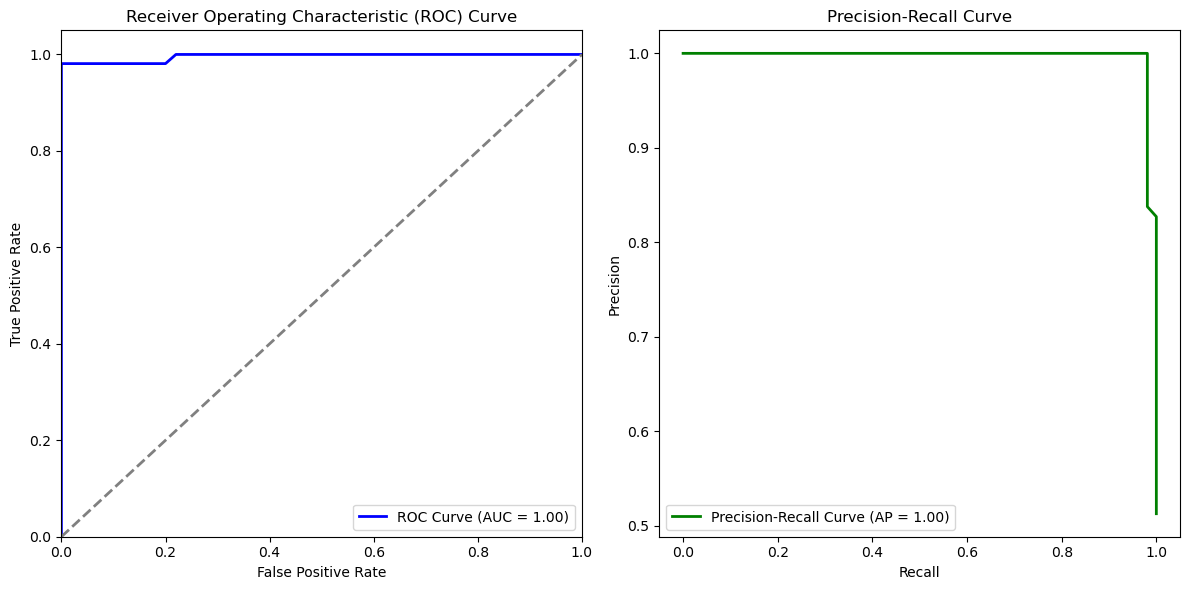

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

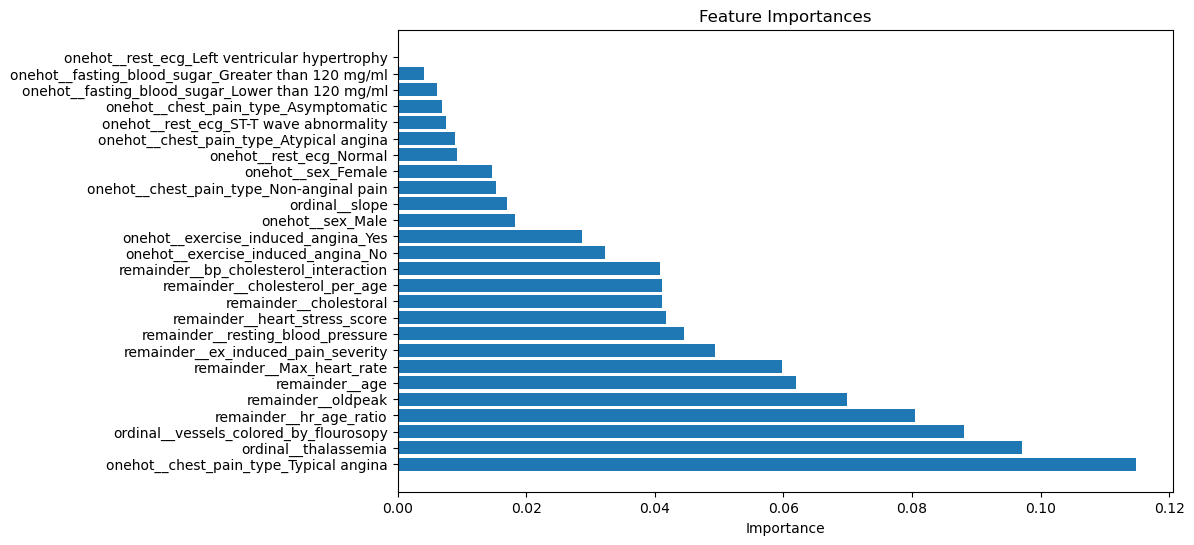

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the trained model
importances = model.named_steps['clf'].feature_importances_

# Your feature names after transformation
feature_names = np.array(['onehot__sex_Female', 'onehot__sex_Male',
       'onehot__chest_pain_type_Asymptomatic',
       'onehot__chest_pain_type_Atypical angina',
       'onehot__chest_pain_type_Non-anginal pain',
       'onehot__chest_pain_type_Typical angina',
       'onehot__fasting_blood_sugar_Greater than 120 mg/ml',
       'onehot__fasting_blood_sugar_Lower than 120 mg/ml',
       'onehot__rest_ecg_Left ventricular hypertrophy',
       'onehot__rest_ecg_Normal',
       'onehot__rest_ecg_ST-T wave abnormality',
       'onehot__exercise_induced_angina_No',
       'onehot__exercise_induced_angina_Yes', 'ordinal__slope',
       'ordinal__vessels_colored_by_flourosopy', 'ordinal__thalassemia',
       'remainder__age', 'remainder__resting_blood_pressure',
       'remainder__cholestoral', 'remainder__Max_heart_rate',
       'remainder__oldpeak', 'remainder__cholesterol_per_age',
       'remainder__hr_age_ratio', 'remainder__bp_cholesterol_interaction',
       'remainder__ex_induced_pain_severity',
       'remainder__heart_stress_score'])

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel("Importance")
plt.show()

In [22]:
onehot_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
               'rest_ecg', 'exercise_induced_angina']
ordinal_cols = ['slope', 'vessels_colored_by_flourosopy', 'thalassemia']
numeric_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak','cholesterol_per_age','hr_age_ratio',
               'bp_cholesterol_interaction']

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols)
], remainder='passthrough')

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model_xgb = Pipeline([
     ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42, max_depth=11))
])

In [25]:
model_xgb.fit(X_train, y_train)
y_pred_x = model_xgb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_x))
print("\nClassification Report:\n", classification_report(y_test, y_pred_x))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_x))

Accuracy: 0.9805194805194806

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Confusion Matrix:
 [[150   0]
 [  6 152]]


In [26]:
xgb = Pipeline([
     ('preprocessor', preprocessor),
    ('clf', XGBClassifier())
])

NameError: name 'XGBClassifier' is not defined

In [ ]:
xgb.fit(X_train, y_train)
y_pred_x = xgb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_x))
print("\nClassification Report:\n", classification_report(y_test, y_pred_x))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_x))

In [ ]:
import joblib

In [ ]:
# joblib.dump(model, 'rfc_heart_disease.pkl')

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from xgboost import XGBClassifier
estimators = [('dt', model_xgb),("rfc",model)]

In [ ]:
voting_cls = VotingClassifier(estimators=estimators, voting='soft', weights=[1,2]).fit(X_train, y_train)
y_ = voting_cls.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_))
print("\nClassification Report:\n", classification_report(y_test, y_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_))

In [ ]:
estimate = [('dt', model_xgb),("rfc",model),('xgb',xgb)]
voting_cl = VotingClassifier(estimators=estimate, voting='soft', weights=[1,2,2]).fit(X_train, y_train)
y__ = voting_cl.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y__))
print("\nClassification Report:\n", classification_report(y_test, y__))
print("Confusion Matrix:\n", confusion_matrix(y_test, y__))

In [ ]:
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
            estimate = [('dt', model_xgb),("rfc",model),('xgb',GradientBoostingClassifier())]
            voting_cl = VotingClassifier(estimators=estimate, voting='hard', weights=[w1,w2,w3]).fit(X_train, y_train)
            y__ = voting_cl.predict(X_test)
            print("Accuracy:", accuracy_score(y_test, y__))
            print("\nClassification Report:\n", classification_report(y_test, y__))
            print("Confusion Matrix:\n", confusion_matrix(y_test, y__))

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
onehot_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
               'rest_ecg', 'exercise_induced_angina']
ordinal_cols = ['slope', 'vessels_colored_by_flourosopy', 'thalassemia']
numeric_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak','cholesterol_per_age','hr_age_ratio',
               'bp_cholesterol_interaction']

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols)
], remainder='passthrough')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
bagging_cls = Pipeline([
     ('preprocessor', preprocessor),
    ('clf', BaggingClassifier(estimator=GradientBoostingClassifier(), n_estimators=50))
])

In [ ]:
bagging_cls.fit(X_train, y_train)
y_pre = bagging_cls.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pre))
print("\nClassification Report:\n", classification_report(y_test, y_pre))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pre))